# Warm starting

[![Slides](https://img.shields.io/badge/🦌-ReHLine-blueviolet)](https://rehline-python.readthedocs.io/en/latest/)

Now we use the dataset "madelon" and compare the time executed with and without `warm-start` technique


In [ ]:
import numpy as np
from rehline import plqERM_Ridge_path_sol
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import time

In [ ]:
import openml

## load the dataset
dataset = openml.datasets.get_dataset(1485)

X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

y = np.where(y == '2', 1, -1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
## define the loss function and value of Cs
loss = {'name': 'svm'}
Cs = np.logspace(0, 2, 10)


In [ ]:
## we first try solver without warm start

print("\nRunning solver WITHOUT warm start...")
start_no_warm = time.time()
Cs_no_warm, times_no_warm, n_iters_no_warm, loss_no_warm, L2_no_warm, coefs_no_warm = plqERM_Ridge_path_sol(
    X, y,
    loss=loss,
    Cs=Cs,
    max_iter=1000000,
    tol=1e-4,
    verbose=1,
    warm_start=False,
    return_time=True,
)
end_no_warm = time.time()
total_time_no_warm = end_no_warm - start_no_warm


Running solver WITHOUT warm start...


/usr/local/lib/python3.11/dist-packages/rehline/_class.py:419: ConvergenceWarning: ReHLine failed to converge, increase the number of iterations: `max_iter`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/rehline/_class.py:419: ConvergenceWarning: ReHLine failed to converge, increase the number of iterations: `max_iter`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/rehline/_class.py:419: ConvergenceWarning: ReHLine failed to converge, increase the number of iterations: `max_iter`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/rehline/_class.py:419: ConvergenceWarning: ReHLine failed to converge, increase the number of iterations: `max_iter`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/rehline/_class.py:419: ConvergenceWarning: ReHLine failed to converge, increase the number of iterations: `max_iter`.
  warnings.warn(



PLQ ERM Path Solution Results
C Value        Iterations     Time (s)            Loss                L2 Norm             
------------------------------------------------------------------------------------------
1              118636         39.936846           1594.670300         2.543800            
1.668          192306         64.421898           1594.737600         2.679600            
2.783          485638         151.079622          1594.824000         2.742100            
4.642          700475         211.876613          1594.906600         2.783700            
7.743          1000000        299.254036          1595.525600         2.815700            
12.92          1000000        304.475502          1596.999200         2.878100            
21.54          1000000        312.734514          1629.704900         2.913800            
35.94          1000000        323.737584          1631.008400         2.961700            
59.95          1000000        336.862036          1606.8015

/usr/local/lib/python3.11/dist-packages/rehline/_class.py:419: ConvergenceWarning: ReHLine failed to converge, increase the number of iterations: `max_iter`.
  warnings.warn(


In [ ]:
## then try solver with warm start

print("\nRunning solver WITH warm start...")
start_warm = time.time()
Cs_warm, times_warm, n_iters_warm, loss_warm, L2_warm, coefs_warm = plqERM_Ridge_path_sol(
    X, y,
    loss=loss,
    Cs=Cs,
    max_iter=1000000,
    tol=1e-4,
    verbose=1,
    warm_start=True,
    return_time=True,
)
end_warm = time.time()
total_time_warm = end_warm - start_warm



Running solver WITH warm start...

PLQ ERM Path Solution Results
C Value        Iterations     Time (s)            Loss                L2 Norm             
------------------------------------------------------------------------------------------
1              118636         40.181799           1594.670300         2.543800            
1.668          104841         31.897681           1594.740700         2.682700            
2.783          202547         61.151798           1594.831900         2.746200            
4.642          126871         37.826569           1594.896400         2.779400            
7.743          248854         73.859064           1595.001200         2.822700            
12.92          285847         85.796846           1595.117000         2.869000            
21.54          465084         139.253013          1595.146600         2.879800            
35.94          190967         56.896123           1595.165800         2.885900            
59.95          399966   

In [ ]:
## print the comparison and summary

print("\nComparison: Warm Start vs. No Warm Start")
print("=" * 90)
print(f"{'C Value':<12}{'Iter_without_WS':<18}{'Time_without_WS':<20}"
      f"{'Iter_WS':<18}{'Time_WS':<15}")
print("-" * 90)

for C, iters_nw, time_nw, iters_w, time_w in zip(Cs, n_iters_no_warm, times_no_warm, n_iters_warm, times_warm):
    print(f"{C:<12.4g}{iters_nw:<18}{time_nw:<20.6f}"
          f"{iters_w:<18}{time_w:<15.6f}")

print("=" * 90)
print(f"{'Total Time (without WS)':<30}{total_time_no_warm:.6f} sec")
print(f"{'Total Time (WS)':<30}{total_time_warm:.6f} sec")
print(f"{'Speedup with Warm Start':<30}{total_time_no_warm / total_time_warm:.2f}x Faster")
print("=" * 90)



Comparison: Warm Start vs. No Warm Start
C Value     Iter_without_WS   Time_without_WS     Iter_WS           Time_WS        
------------------------------------------------------------------------------------------
1           118636            39.936846           118636            40.181799      
1.668       192306            64.421898           104841            31.897681      
2.783       485638            151.079622          202547            61.151798      
4.642       700475            211.876613          126871            37.826569      
7.743       1000000           299.254036          248854            73.859064      
12.92       1000000           304.475502          285847            85.796846      
21.54       1000000           312.734514          465084            139.253013     
35.94       1000000           323.737584          190967            56.896123      
59.95       1000000           336.862036          399966            118.717955     
100         1000000        

## Time comparison
The above summary table shows the `warm-start` solver is **3.20 times faster** than the `cold-start` solver.

The warm-start solver also consistently reaches optimal results within the maximum iteration limit, which the cold-start solver doesn't. This means the actual speedup from warm-starting is likely even higher.

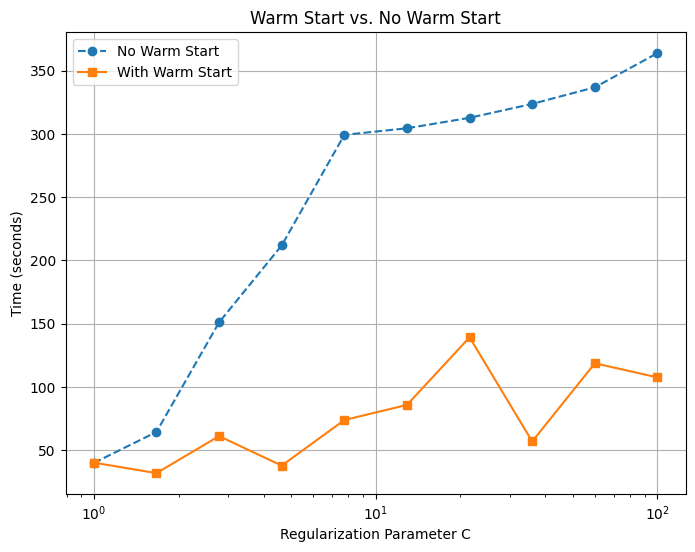

In [ ]:
## visualize the time used for each solver

plt.figure(figsize=(8, 6))
plt.plot(Cs, times_no_warm, label="No Warm Start", marker="o", linestyle="--")
plt.plot(Cs, times_warm, label="With Warm Start", marker="s", linestyle="-")
plt.xscale("log")
plt.xlabel("Regularization Parameter C")
plt.ylabel("Time (seconds)")
plt.title("Warm Start vs. No Warm Start")
plt.legend()
plt.grid(True)
plt.show()